In [21]:
import ROOT as R
import time

In [33]:
lm_run23 = R.TFile('/Users/cheng/WorkRun23/data/Run2_3_LM_spectrum_and_integral.root')
lm_run4 = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/gm2pro_daq_offline_dqc_run4U_5307A_coincidenceFinderLM_grid_gridRun.root')

nominal_run2 = R.TFile('/Users/cheng/WorkRun23/data/Run2all/gm2pro_daq_offline_dqc_Run2All.root')
nominal_run4u = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_empirical_nominal.root')




lm_spec_run4u = lm_run4.Get('testCoincidenceFinder/hist_cso')
lm_spec_run2 = lm_run23.Get('run2all_LM_spectrum')

raw_wiggle_run2 =nominal_run2.Get('wiggle1700/Tsys_stdp_T_1.0')
et_run4u = nominal_run4u.Get('topDir/Iter0/RawHists/RawHist/rawTimesAndEnergies')
bin_start = et_run4u.GetYaxis().FindBin(1700)
bin_end = et_run4u.GetYaxis().FindBin(3100)
raw_wiggle_run4u = et_run4u.ProjectionX('wiggle run 4u',bin_start,bin_end)


In [37]:

def Trans(hist):
    hnew = R.TH1D('hist new %s'%(time.time()),'',6000,0,6000*0.1492)
    N = hist.GetNbinsX()
    for n in range(N):
        v = hist.GetBinContent(n+1)
        e = hist.GetBinError(n+1)
        hnew.SetBinContent(n+1,v)
        hnew.SetBinError(n+1,e)
    return hnew

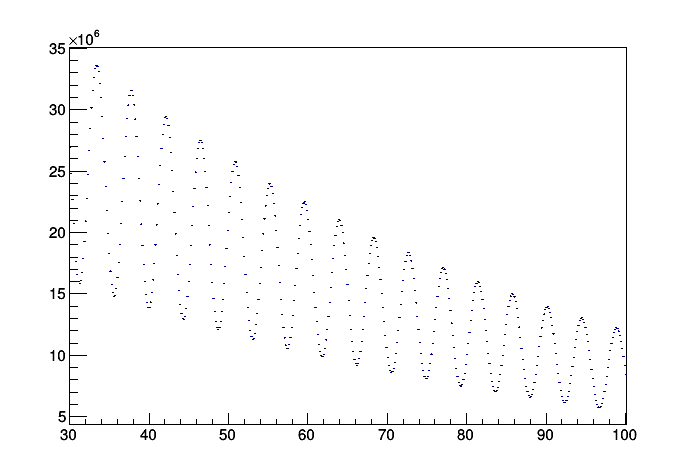

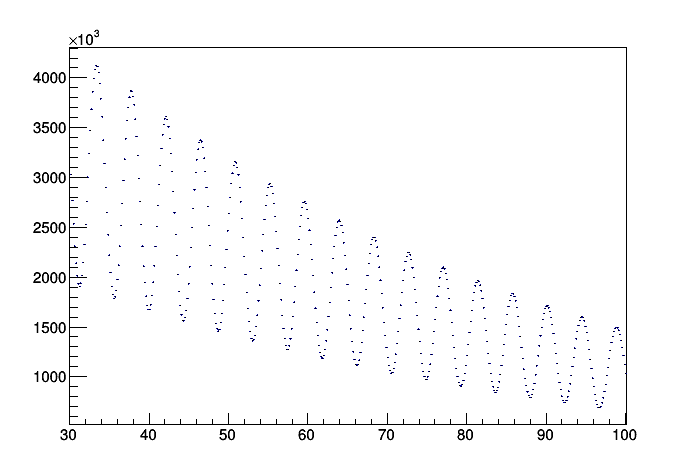

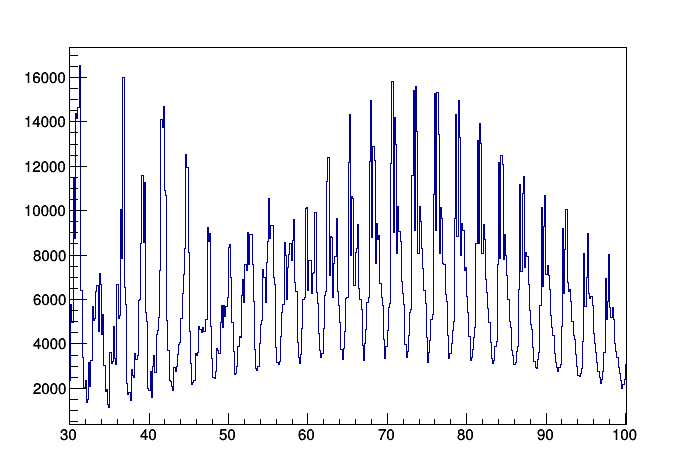

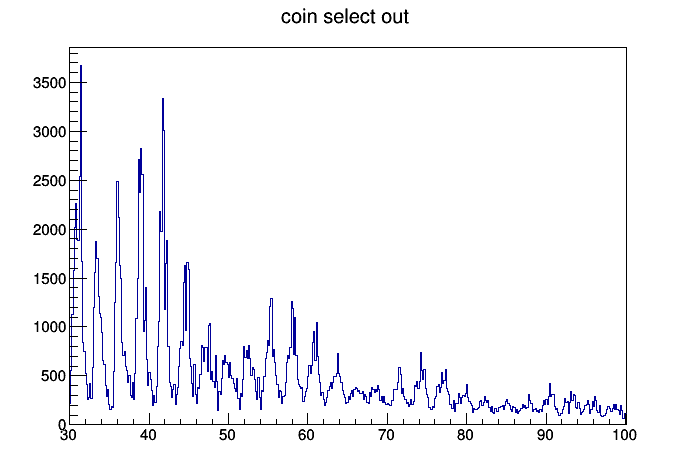

In [35]:
raw_wiggle_run4u_rebin = Trans(raw_wiggle_run4u)



cs1 = Draw(raw_wiggle_run2,[30,100])
cs2 = Draw(raw_wiggle_run4u_rebin,[30,100])
cs3 = Draw(lm_spec_run2,[30,100])
cs4 = Draw(lm_spec_run4u,[30,100])

0.0
0.0


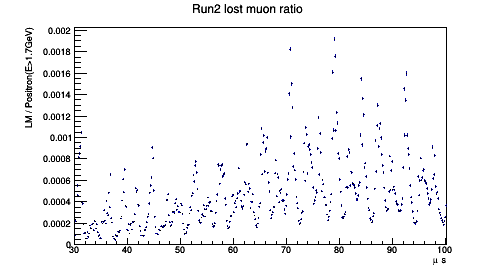

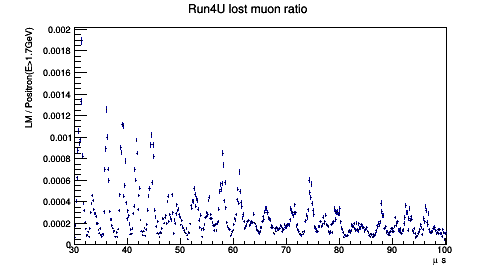

In [46]:
def Draw(hist,xs=None,title=None):
    hist.SetStats(0)
    c = R.TCanvas('c %s'%(time.time()),'',500,300)
    c.SetLeftMargin(0.15)
    if xs != None:
        hist.GetXaxis().SetRangeUser(*xs)
    if title!=None:
        hist.SetTitle(title)
    hist.Draw()    
    print (hist.GetYaxis().GetTitleOffset())
    c.Draw()
    return [hist,c]

raw_wiggle_run2_rebin = Trans(raw_wiggle_run2)
lm_spec_run2_rebin = Trans(lm_spec_run2)
lm_spec_run4u_rebin = Trans(lm_spec_run4u)

ratio_run2 = lm_spec_run2_rebin.Clone()
ratio_run4u = lm_spec_run4u_rebin.Clone()

ratio_run2.Divide(raw_wiggle_run2_rebin)
ratio_run4u.Divide(raw_wiggle_run4u_rebin)

cs5 = Draw(ratio_run2, [30,100],'Run2 lost muon ratio;#mu s;LM / Positron(E>1.7GeV)')
cs6 = Draw(ratio_run4u,[30,100],'Run4U lost muon ratio;#mu s;LM / Positron(E>1.7GeV)')